# Problem Statement: Concrete Strength Prediction


## Objective:
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

## Resources Available: 
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

## Attribute Information:
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.


Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable
 


## <a id = "link1"></a> Import Libraries and Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Importing the libraries for ploting
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#importing train test split from sklearn for preraing traing and test dataset for the logistic model

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

**Reading the dataset:**

In [3]:
df = pd.read_csv('/content/concrete.csv');
data = df.copy()

## Exploratory Data Quality Report 

In [4]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
# No of rows and columns
data.shape

(1030, 9)



Dataset has 1030 rows and 9 feature attributes.

**Data Type of the dataset:**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
# Null checks of the dataset
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
data[data[:] == 0.0].count

<bound method DataFrame.count of       cement  slag  ash  water  superplastic  coarseagg  fineagg  age  strength
0        NaN   NaN  0.0    NaN           0.0        NaN      NaN  NaN       NaN
1        NaN   NaN  NaN    NaN           NaN        NaN      NaN  NaN       NaN
2        NaN   0.0  NaN    NaN           NaN        NaN      NaN  NaN       NaN
3        NaN   NaN  0.0    NaN           0.0        NaN      NaN  NaN       NaN
4        NaN   NaN  0.0    NaN           NaN        NaN      NaN  NaN       NaN
...      ...   ...  ...    ...           ...        ...      ...  ...       ...
1025     NaN   0.0  NaN    NaN           NaN        NaN      NaN  NaN       NaN
1026     NaN   0.0  0.0    NaN           NaN        NaN      NaN  NaN       NaN
1027     NaN   NaN  NaN    NaN           NaN        NaN      NaN  NaN       NaN
1028     NaN   NaN  0.0    NaN           0.0        NaN      NaN  NaN       NaN
1029     NaN   0.0  0.0    NaN           0.0        NaN      NaN  NaN       NaN

[1030 

In [9]:
# Identifying the duplicate rows
duplicateRowsDF = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
     cement   slag  ash  water  superplastic  coarseagg  fineagg  age  strength
278   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3     33.40
298   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3     33.40
400   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3     35.30
420   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3     35.30
463   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56     77.30
468   252.0    0.0  0.0  185.0           0.0     1111.0    784.0   28     19.69
482   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91     65.20
493   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91     79.30
517   425.0  106.3  0.0  153.5          16.5      852.1    887.1   56     64.30
525   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28     71.30
527   425.0  106.3  0.0  153.5          16.5      852.

There are no NAN or null values in the dataset . However there are multiple duplicate data in the dataset which we will be dropping.

In [10]:
# Dropping duplicates 
data = data.drop_duplicates()
data.shape

(1005, 9)

In [11]:
# Statistical decsription of the dataset , mean std , etc. 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


### <a id = "link8"></a> Univariate Analysis

In [12]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

**Insights:**
- `The attributes which are of data type numeric

**Statistical description of the data set**

In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


**Function to plot the plots based on data types**

In [14]:
def univariatePlots(data) :
  for col in data.columns :
    if (data[col].dtypes in ("int64", "float64")) :
      print("Distplot for numeric column : " , col);
      sns.displot(data[col], kde=True);
    plt.show()


Distplot for numeric column :  cement


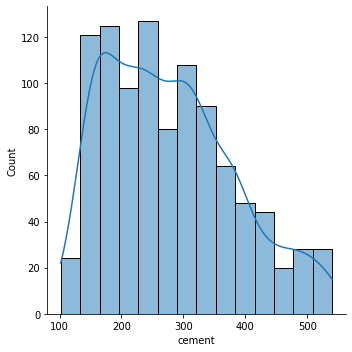

Distplot for numeric column :  slag


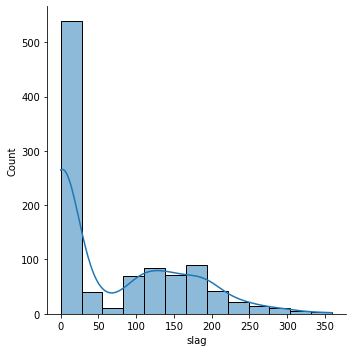

Distplot for numeric column :  ash


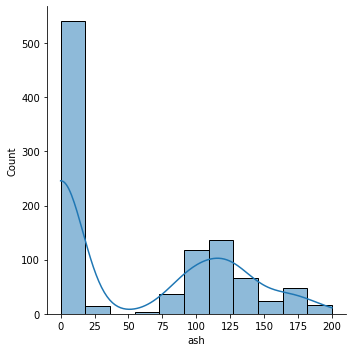

Distplot for numeric column :  water


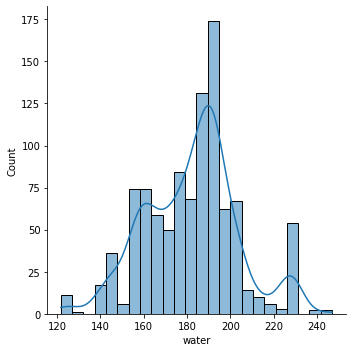

Distplot for numeric column :  superplastic


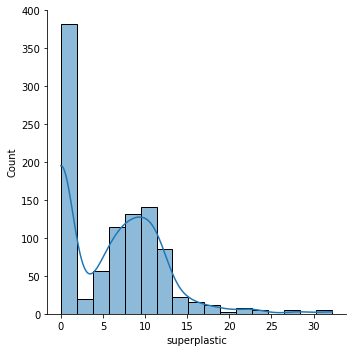

Distplot for numeric column :  coarseagg


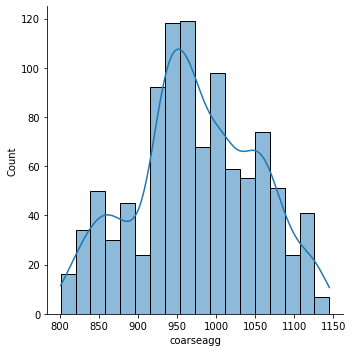

Distplot for numeric column :  fineagg


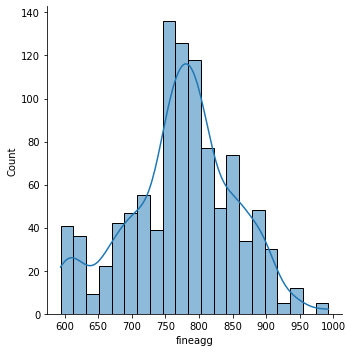

Distplot for numeric column :  age


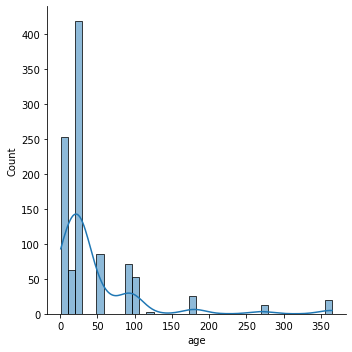

Distplot for numeric column :  strength


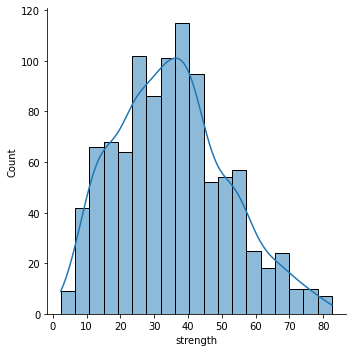

In [15]:
univariatePlots(data)

**Insights:**
- `attribute cement is uniformly distributed`
- `There are many zeros values for slag and ash attributes which seems left skewed`
- `water and courseagg also seems mostly uniformly distributes`
- `age in not uniformly distributed`

### Outliers detection for the attributes 

In [16]:
# function to calculate the IQR and upper and lower bound range
def calculateIQR(col) :
  Q1 = np.percentile(col, 25, interpolation='midpoint')
  Q3 = np.percentile(col, 75, interpolation='midpoint')
  IQR = Q3-Q1
  lower_bound = Q1 -(1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  return lower_bound, upper_bound 

Count of upper and lower range outliers and percenrage 

In [17]:
print("Outliers details for the dataset :")
for col in data.columns :
  if data[col].dtypes in ('int64', "float64") :
    lower_range, upper_range = calculateIQR(data[col])
    print("---------------- " + col +  "--------------------------------------------")
    print("Count of upper-range outliers - ", data[data[col] > upper_range].shape[0])
    print("Percentage of upper-range outliers - ", (data[data[col] > upper_range].shape[0] / data.shape[0])* 100)
    print("Count of lower-range outliers - ", data[data[col] < lower_range].shape[0])
    print("Percentage of lower-range outliers - ", (data[data[col] < lower_range].shape[0] / data.shape[0]) * 100)
    print("---------------------------------------------------------------------")

Outliers details for the dataset :
---------------- cement--------------------------------------------
Count of upper-range outliers -  0
Percentage of upper-range outliers -  0.0
Count of lower-range outliers -  0
Percentage of lower-range outliers -  0.0
---------------------------------------------------------------------
---------------- slag--------------------------------------------
Count of upper-range outliers -  2
Percentage of upper-range outliers -  0.1990049751243781
Count of lower-range outliers -  0
Percentage of lower-range outliers -  0.0
---------------------------------------------------------------------
---------------- ash--------------------------------------------
Count of upper-range outliers -  0
Percentage of upper-range outliers -  0.0
Count of lower-range outliers -  0
Percentage of lower-range outliers -  0.0
---------------------------------------------------------------------
---------------- water--------------------------------------------
Count of upp

**Insights:**
- `slag , water, superplastic, fineagg, age , strength features have few outliers. We shall see these outliers more in the box plots`


Box plot to represent the IQR and outliers for the attributes

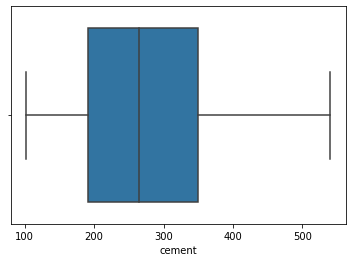

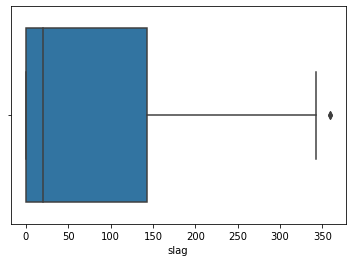

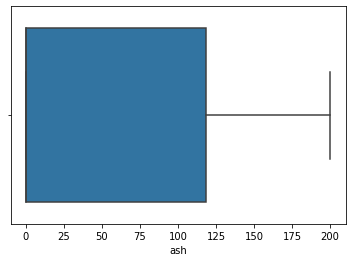

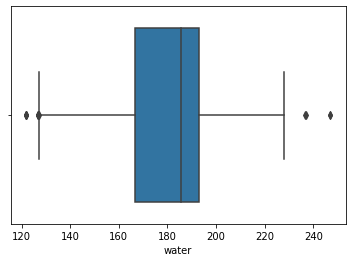

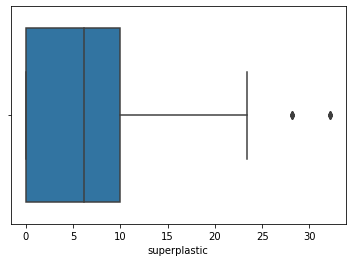

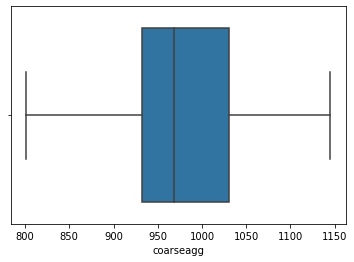

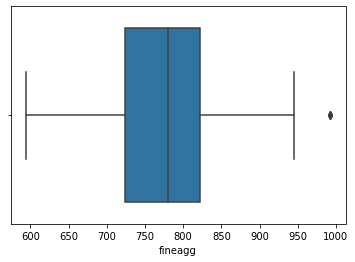

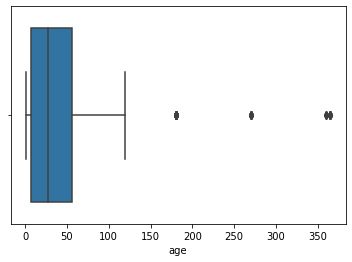

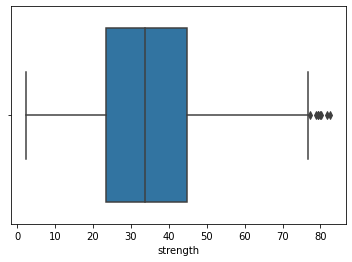

In [18]:
for col in data.columns :
    sns.boxplot(data[col] , orient="h")
    plt.show()

### <a id = "link10"></a> Bivariate & Multivariate Analysis

In [19]:
# function to plot the boxplot and countplot against the target variable accordingly 
def multiVariate(data) :
  for col in data.columns :
      histplot(col)

def histplot(col) :
   print("Hist plot for attribute "+ col + " against target attribute")
   #sns.boxplot(x=data[col] , y=data['Target'], data=data)
   sns.histplot(x=data[col] , y=data['strength'], data=data)
   plt.show()

def showCountPlot(col) :
  print("Count-Plot for attribute "+ col + " against target attribute")
  sns.countplot(x=data[col], hue='strength', data=data)
  plt.show()

Hist plot for attribute cement against target attribute


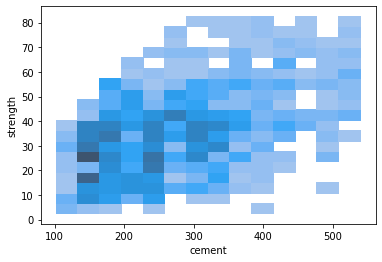

Hist plot for attribute slag against target attribute


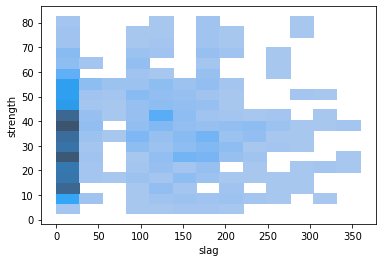

Hist plot for attribute ash against target attribute


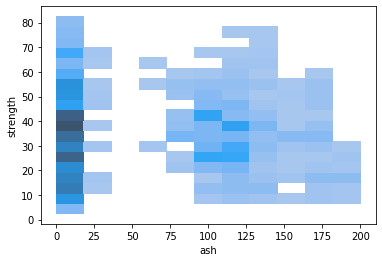

Hist plot for attribute water against target attribute


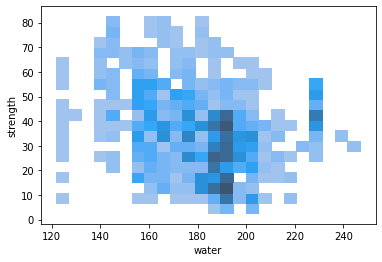

Hist plot for attribute superplastic against target attribute


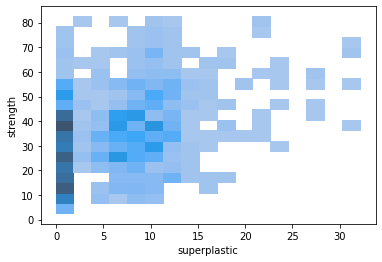

Hist plot for attribute coarseagg against target attribute


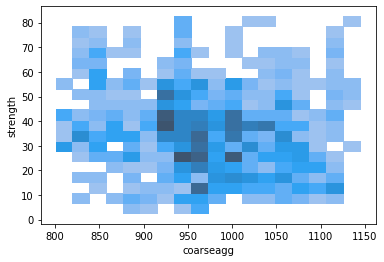

Hist plot for attribute fineagg against target attribute


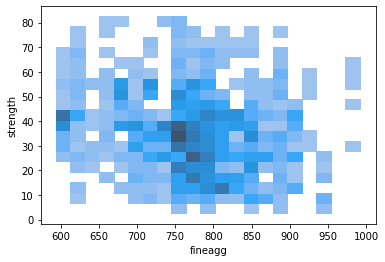

Hist plot for attribute age against target attribute


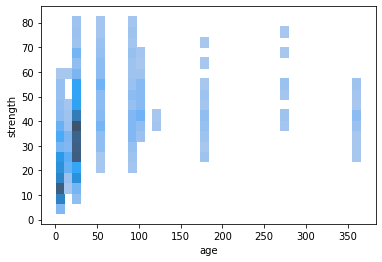

Hist plot for attribute strength against target attribute


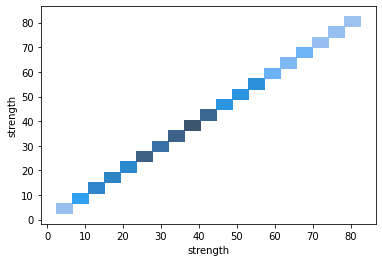

In [20]:
multiVariate(data)

Pair plot to show the corelation beetween the continuous attributes

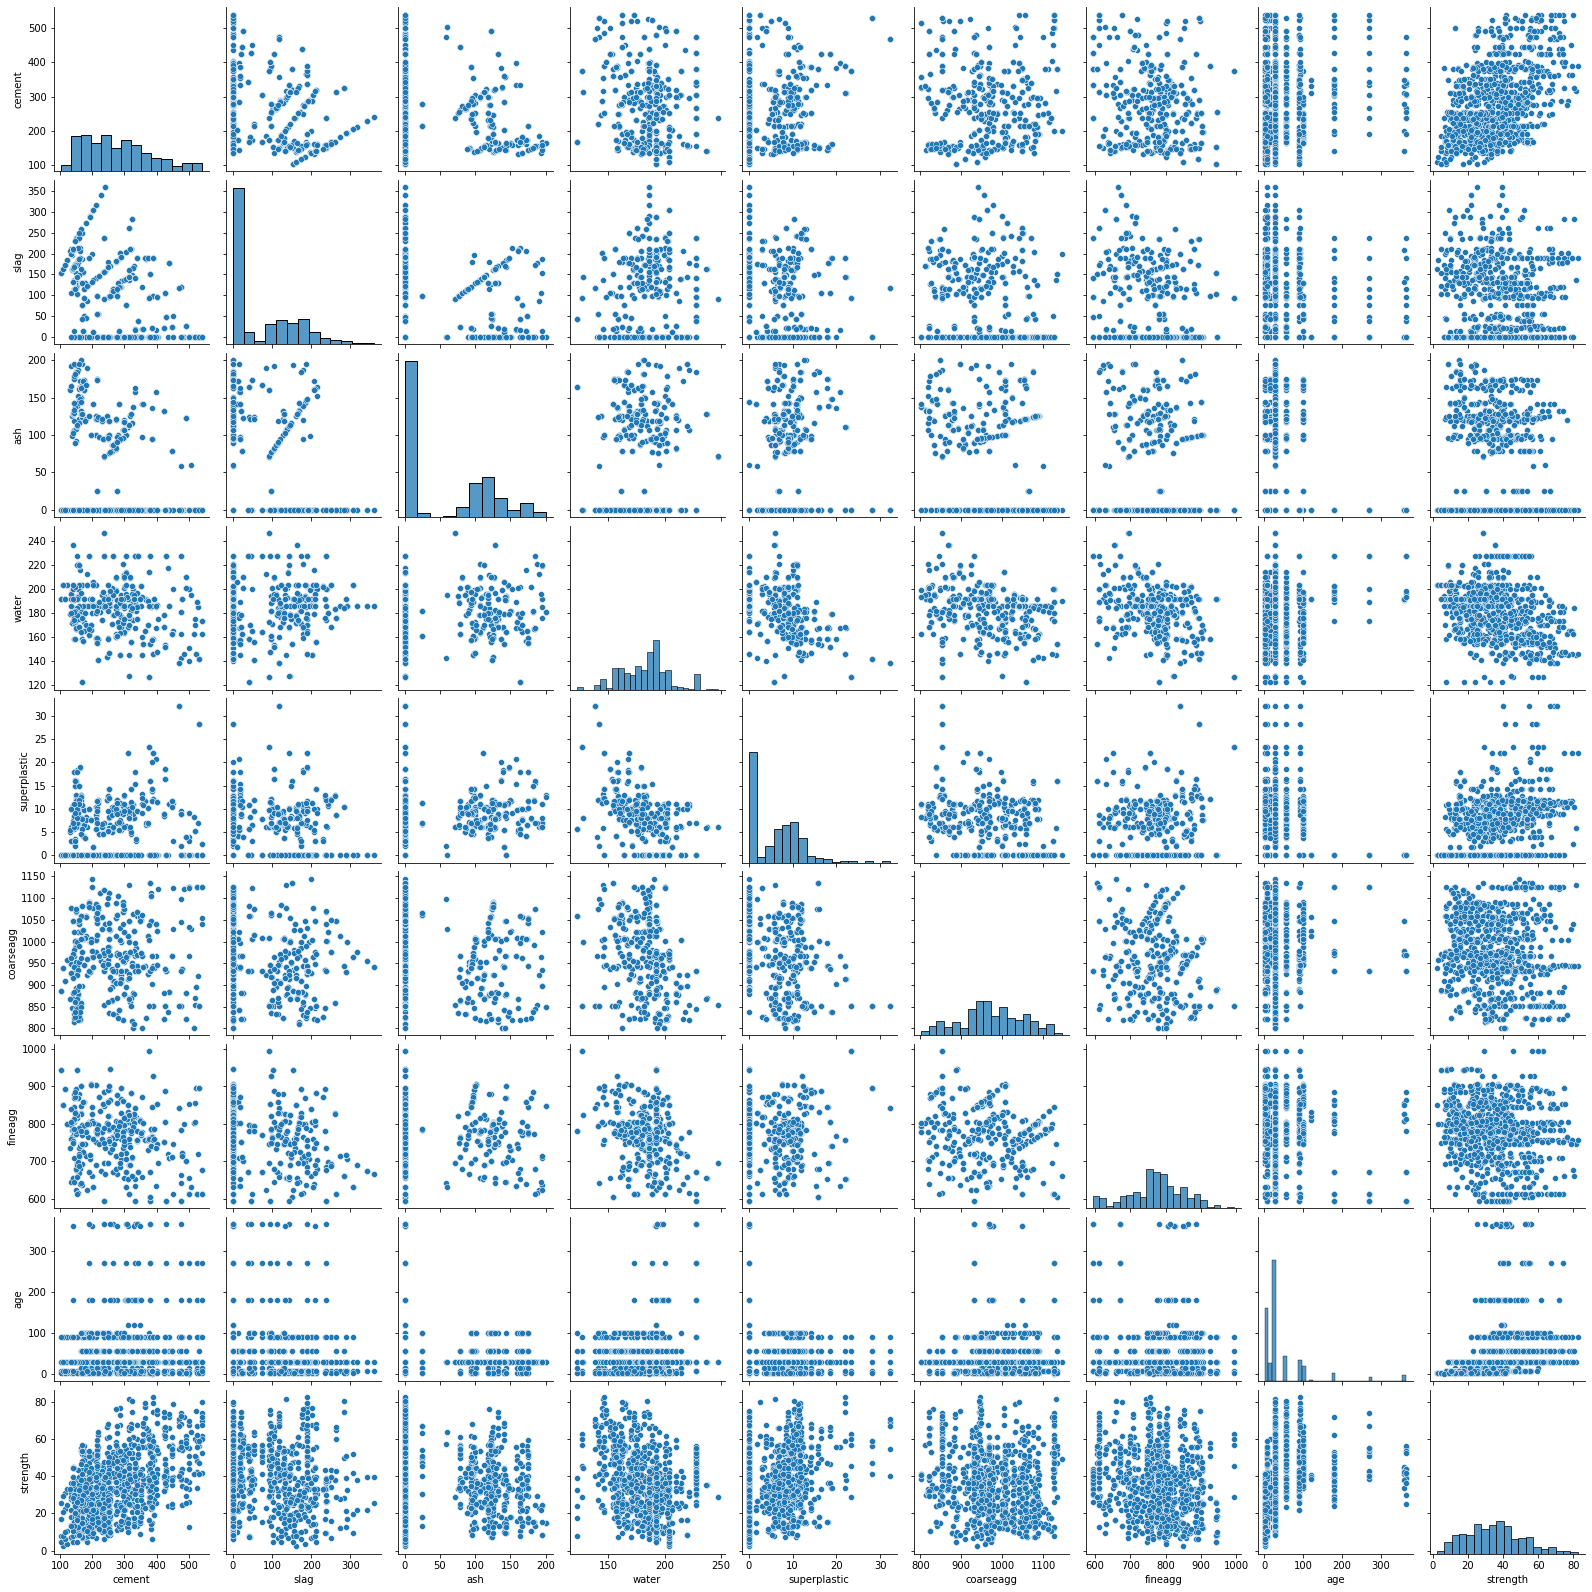

In [21]:
sns.pairplot(data)
plt.show()

** Observation between 'strength' and other attributes indicate the relationship is not really linear. **

Heatmap for the correlation

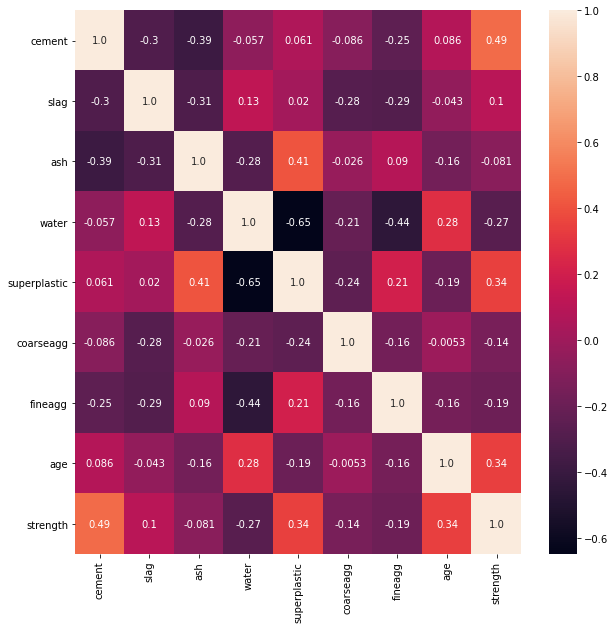

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt=".2")
plt.show()

In [23]:
data[data.columns[:]].corr()['strength'][:]

cement          0.488283
slag            0.103374
ash            -0.080648
water          -0.269624
superplastic    0.344209
coarseagg      -0.144717
fineagg        -0.186448
age             0.337367
strength        1.000000
Name: strength, dtype: float64

**Insights**
- `Mostly all the attributes are independent of each other and less correlation`
- `superplastic and water seems to have a high inverse corelation beetween them`

## Feature Engineering techniques


### <a id = "link12"></a> Split the data into training and test set in the ratio of 70:30 respectively

In [24]:
x = data.drop(['strength'], axis=1)

y = data[['strength']]

results = pd.DataFrame(columns=('ModelType', 'R2Score'))

In [25]:
#importing train test split from sklearn for preraing traing and test dataset for the logistic model

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)

Distribution of the train and test data for the target variable

Distribution of target variable in original data
Distribution of target variable in training data
Distribution of target variable in test data


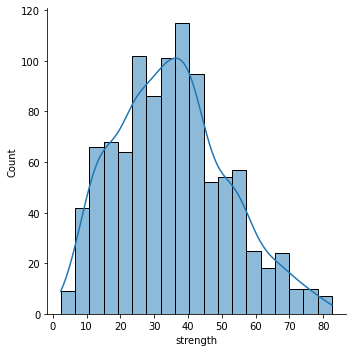

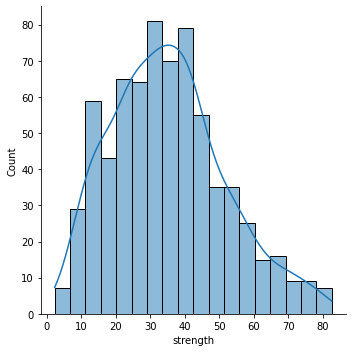

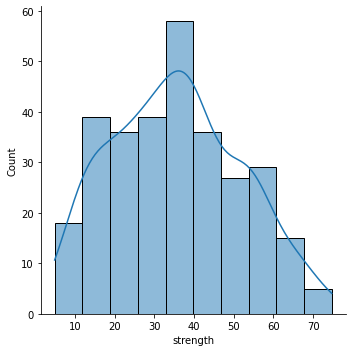

In [26]:
print("Distribution of target variable in original data")
sns.displot(data['strength'], kde=True);
print("Distribution of target variable in training data")
sns.displot(y_train['strength'], kde=True);
print("Distribution of target variable in test data")
sns.displot(y_test['strength'], kde=True);
plt.show()


**Note**
- `The disctribution of the target variable 
'strength" is uniformally distributed accross the training and test data preserving its distribution from original data`

** Fit Linear Model **

**Adding interaction terms**

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
x_poly = poly.fit_transform(x)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred2 = poly_clf.predict(x_test2)

print(poly_clf.score(x_train2, y_train))

0.7552496688240806


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Mean Absolute Error
mean_absolute_error(y_test, y_pred2)

6.93356409105557

In [30]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, poly_clf.coef_[0][idx]))

The coefficient for cement is -1.1394249665637108e-10
The coefficient for slag is 0.26329367928732944
The coefficient for ash is 0.16860320648923335
The coefficient for water is -0.6263351171071672
The coefficient for superplastic is 1.5590840842720723
The coefficient for coarseagg is -7.222702545762499
The coefficient for fineagg is -0.060950685729190886
The coefficient for age is -0.23908634123062691


In [31]:
intercept = poly_clf.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 20.549788242793802


In [32]:
# R2 Squared:
r2_score(y_test, y_pred2)

0.6911067144260906

In [33]:
values_to_add = {'ModelType': 'Polynomial Linear Regression', 'R2Score': r2_score(y_test, y_pred2)}
row_to_add = pd.Series(values_to_add , name = 'x')

results = results.append(row_to_add)
results

,ModelType,R2Score
x,Polynomial Linear Regression,0.691107


Feature Engineering techniques



K-Fold Cros Validation

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

seed = 6
kfold = model_selection.KFold(n_splits=20)

model = LinearRegression()

results = model_selection.cross_val_score(poly_clf, x, y, scoring='neg_mean_squared_error', cv=kfold)
print("Mean Square Error: %.3f (%.3f)" % (-results.mean(), results.std()))


Mean Square Error: 107.473 (29.210)


**Grid Search **

In [35]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lr = GridSearchCV(poly_clf,parameters, cv=50)



In [36]:
grid_lr.fit(x_train2, y_train)
print ("r2", grid_lr.best_score_)
print ("Best Params", grid_lr.best_params_)

r2 0.6750578638606322
Best Params {'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [37]:
grid_lr.fit(x_train2, y_train)

GridSearchCV(cv=50, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
y_pred_gs = grid_lr.predict(x_test2)
mean_absolute_error(y_test, y_pred_gs)

6.933564091054612

In [39]:
# R2 Squared:
r2_score(y_test, y_pred_gs)

0.6911067144253566

## <a id = "link19"></a> Conclusion Buisness Insights

### Answer the following questions :

- Write the significance of the R2 score from the business perspective. Explain the effect of an increase/decrease in the R2 score on the business model?

 **Answer** : R2 score here describes how well the model describes or understand the variance in strenght of the cement. Increase in the R2 score would means the model can very well describes the variance in strength of cement and hence can predict good strength for the given attributes as input.

- Write down the inference about the data analysis and write the recommendations which can be beneficial to the business based on the whole analysis. Also, write the reason for your recommendation?

 **Answer** : 
  slag , ash , coarseagg are the most inportant factors that determines the strengh of the cement . 